# Dependencies 

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [86]:
cv_dataset = "~/Downloads/2019-coronavirus-dataset/2019_nC0v_20200121_20200126 - SUMMARY.csv"
cvd = pd.read_csv(cv_dataset)
cvd = cvd.fillna(0)

In [87]:
china_cvd = cvd[cvd.Country == 'Mainland China']
china_cvd

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
5,Sichuan,Mainland China,1/21/2020,2.0,1.0,0.0,0.0
6,Tianjin,Mainland China,1/21/2020,2.0,0.0,0.0,0.0
7,Ningxia,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
8,Anhui,Mainland China,1/21/2020,0.0,3.0,0.0,0.0
9,Shandong,Mainland China,1/21/2020,1.0,0.0,0.0,0.0


In [88]:
cnp = np.array(china_cvd[['Province/State','Date last updated','Confirmed','Suspected','Recovered','Deaths']])
Hubei = cnp[cnp[:,0]=='Hubei']
Yunnan = cnp[cnp[:,0]=='Yunnan']
Shanghai = cnp[cnp[:,0]=='Shanghai']

Hubei_infections = Hubei[:,2]
Yunnan_infections = Yunnan[:,2]
Shanghai_infections = Shanghai[:,2]
days = np.arange(len(Hubei_infections))

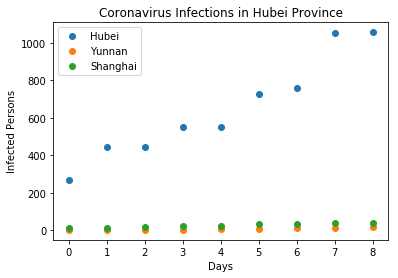

In [89]:
plt.plot(Hubei_infections,'o', label='Hubei')
plt.plot(Yunnan_infections,'o', label='Yunnan')
plt.plot(Shanghai_infections,'o', label='Shanghai')
plt.xlabel('Days')
plt.ylabel('Infected Persons')
plt.title('Coronavirus Infections in Hubei Province')
plt.legend()

In [115]:
def infected_function(days, a, b):
    infections = a*np.exp(b*days)
    return(infections)

hubei_fit_params, hubei_fit_cov = scp.optimize.curve_fit(infected_function, days.ravel(), Hubei_infections.ravel().astype(float))
hubei_exp_curve = infected_function(days, hubei_fit_params[0], hubei_fit_params[1])

yun_fit_params, yun_fit_cov = scp.optimize.curve_fit(infected_function, days.ravel(), Yunnan_infections.ravel().astype(float))
yun_exp_curve = infected_function(days, yun_fit_params[0], yun_fit_params[1])

shan_fit_params, hubei_fit_cov = scp.optimize.curve_fit(infected_function, days.ravel(), Shanghai_infections.ravel().astype(float))
shan_exp_curve = infected_function(days, shan_fit_params[0], shan_fit_params[1])

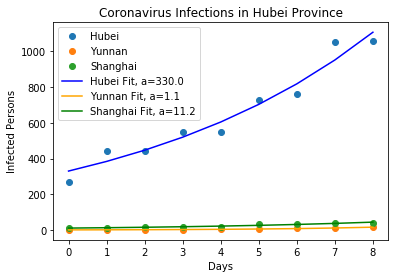

In [127]:
plt.plot(Hubei_infections,'o', label='Hubei')
plt.plot(Yunnan_infections,'o', label='Yunnan')
plt.plot(Shanghai_infections,'o', label='Shanghai')

plt.plot(days, hubei_exp_curve, label = f'Hubei Fit, a={hubei_fit_params[0]:.1f}', c='blue')
plt.plot(days, yun_exp_curve, label = f'Yunnan Fit, a={yun_fit_params[0]:.1f}', c='orange')
plt.plot(days, shan_exp_curve, label = f'Shanghai Fit, a={shan_fit_params[0]:.1f}', c='green')

plt.xlabel('Days')
plt.ylabel('Infected Persons')
plt.title('Coronavirus Infections in Hubei Province')
plt.legend()